# Covariance analysis of the apartment 
<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> This notebook calculates the covariance between the apartments themself. The initial section determines the covariance of the apartments using a time-series with a 10-minutes resampling. The second section extends the analysis to a one-hour resampling, while the third section explores covariance during different periods of the day: night, morning and afternoon using a resample of 6-hours.
    This notebook also investigates the covariance between a group of apartments. It involves grouping five apartments together and repeating the earlier analysis to determine the optimal timestep where the covariance criterion is met.
</div>

Import the needed modules in the notebook.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn import preprocessing as pr

Get the list of the files containing the Domestic Hot Water (DHW) consumption data using the key work 'IECS'.

In [2]:
folder = r"./Data/"
files = os.listdir(folder)
#Get a list of the different files named IECS
list_IECS = [file for file in files if '-IECS' in file]   
list_IECS.sort()

Read the csv file and resample the data for 10 min.

In [3]:
data = {} #Creation of a dictionary
for file in list_IECS:
    df = pd.read_csv(folder + file) #Read the csv file
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 3 min
    data[file[:-4]] = ts 

Create dataframe from the data got previously.

In [4]:
df = pd.DataFrame(data)
df = df[~df.isnull().any(axis=1)]  # remove the row with Nan Value

Conversion of the water consumption from l/s to l/h.

In [5]:
df=df*3600
#print(df)

## Covariance of the apartments with itself

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the period, and then work out the covariance between the apartments themselves. If not sufficient, increase the resampling timestep.
</div>

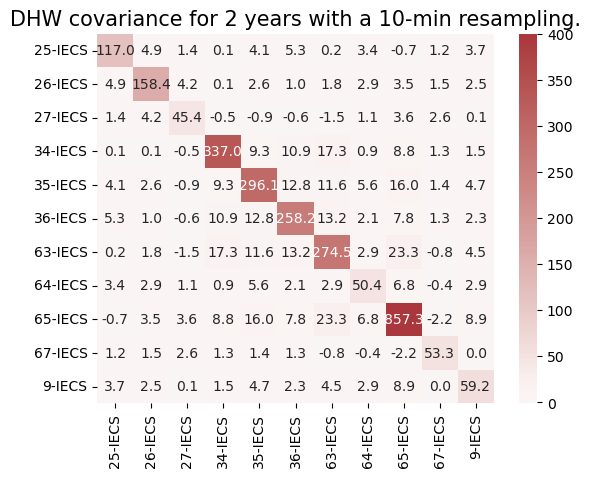

In [6]:
dfh_cov = df.cov() # Covariance matrice of df

sn.heatmap(dfh_cov, annot=True, vmax=400, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with a 10-min resampling.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

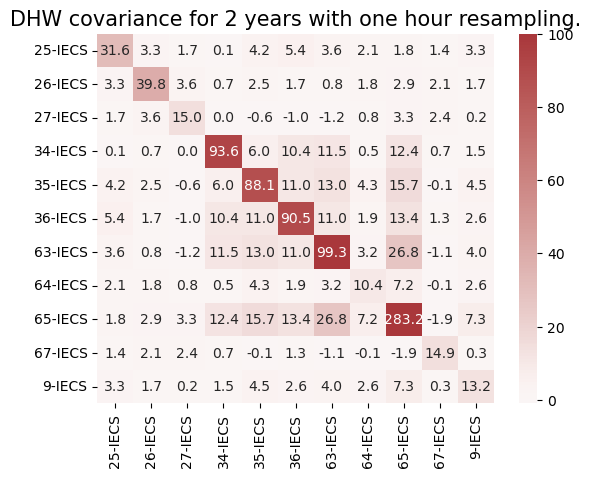

In [7]:
df1_h=df.resample("H").mean() 

df1h_cov = df1_h.cov() # Covariance matrice of df
sn.heatmap(df1h_cov, annot=True, vmax=100, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with one hour resampling.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

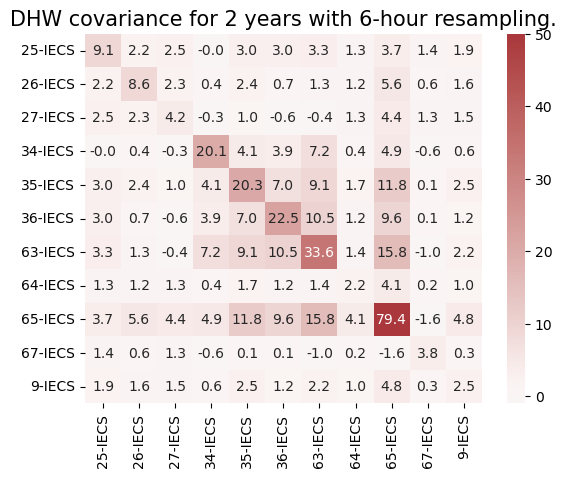

In [8]:
df2_h=df.resample("6H").mean() 

df2h_cov = df2_h.cov() # Covariance matrice of df
sn.heatmap(df2h_cov, annot=True, vmax=50, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with 6-hour resampling.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

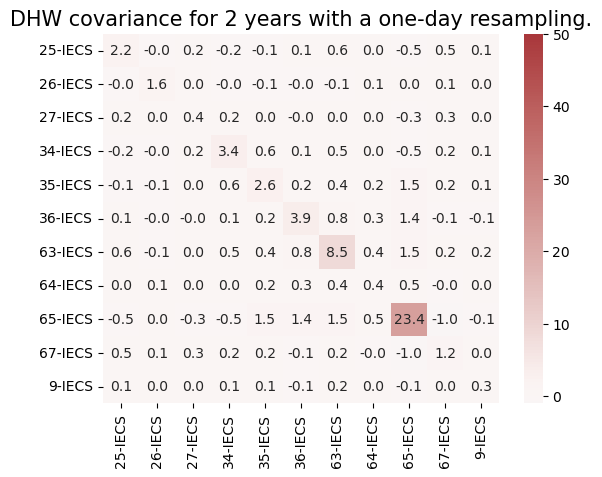

In [9]:
df3_h=df.resample("D").mean() 

df3h_cov = df3_h.cov() # Covariance matrice of df
sn.heatmap(df3h_cov, annot=True, vmax=50, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with a one-day resampling.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

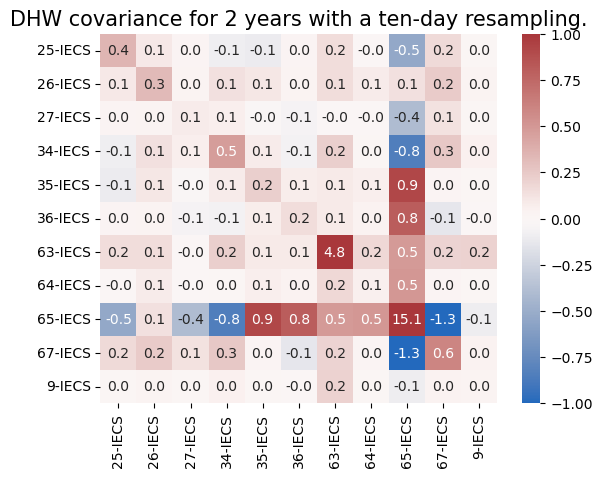

In [10]:
df4_h=df.resample("10D").mean() 

df4h_cov = df4_h.cov() # Covariance matrice of df
sn.heatmap(df4h_cov, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with a ten-day resampling.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

## Covariance of the apartments with the mean value of 3 apartments

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by dropping the values of the apartment we don't need, make the mean of every value, and then work out the covariance of the apartment together. If not sufficient, increase the resampling timestep.
</div>

Drop the columns that we don't need for our analysis

In [11]:
df=df.drop(columns=['34-IECS', '35-IECS', '36-IECS', '63-IECS', '64-IECS', '65-IECS', '67-IECS', '9-IECS' ])
#print(df)

Add the column mean of all the apartments 

In [12]:
df['mean']=df.mean(axis=1)
#print(df)

Work out the covariance of the dataframe df containing the information about the three apartments and their mean using the first resample of 10 min  

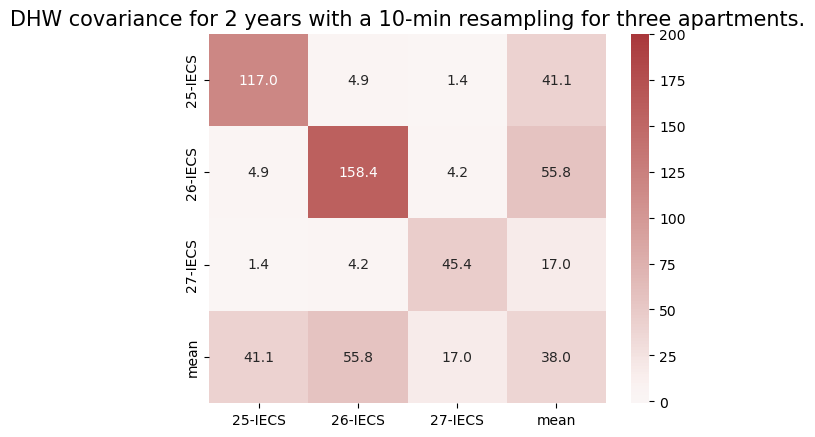

In [13]:
df1_cov = df.cov() # Covariance matrice of df

sn.heatmap(df1_cov, annot=True, vmax=200, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with a 10-min resampling for three apartments.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

Resampling the dataframe of the three apartments and their mean to an hour resampling and then working out the covariance. 

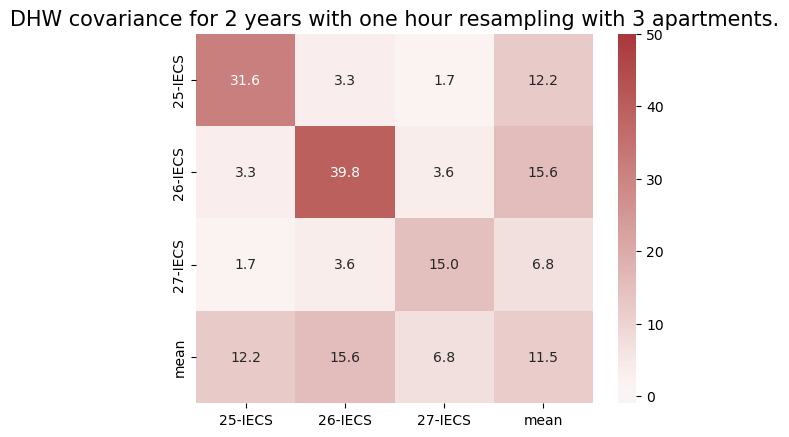

In [14]:
df1=df.resample('H').mean()
#print(df1)

df1_cov = df1.cov() # Covariance matrice of df
sn.heatmap(df1_cov, annot=True, vmax=50, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with one hour resampling with 3 apartments.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

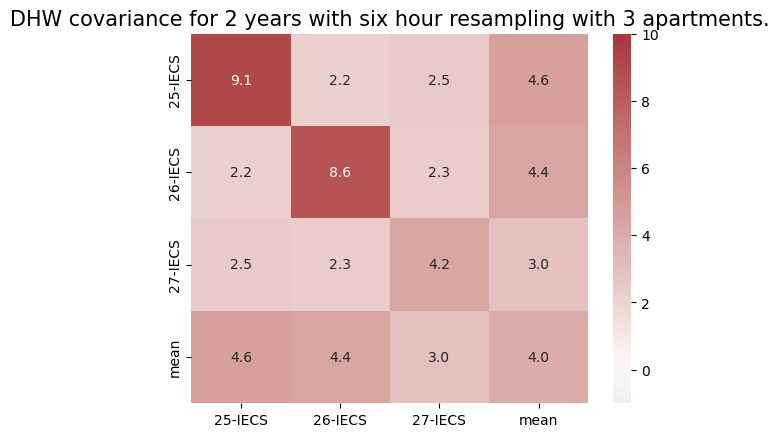

In [15]:
df2=df.resample('6H').mean()
#print(df2)

df2_cov = df2.cov() # Covariance matrice of df
sn.heatmap(df2_cov, annot=True, vmax=10, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with six hour resampling with 3 apartments.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

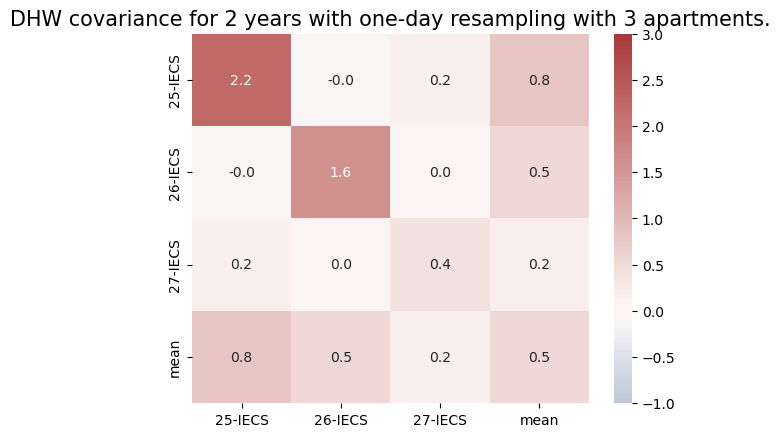

In [16]:
df3=df.resample('D').mean()
#print(df3)

df3_cov = df3.cov() # Covariance matrice of df
sn.heatmap(df3_cov, annot=True, vmax=3, vmin=-1, center=0, cmap='vlag', fmt='.1f') #Creating a scale to visualize the correlation
plt.title('DHW covariance for 2 years with one-day resampling with 3 apartments.', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure